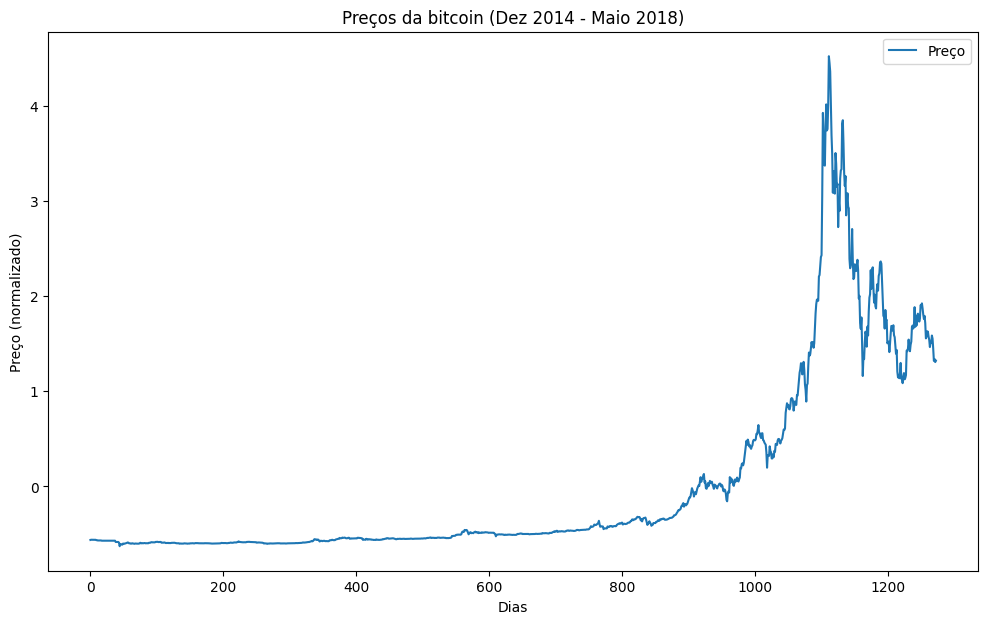

/home/pmilet/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


X_train size: (1018, 7, 1)
y_train size: (1018, 1)
X_test size: (248, 7, 1)
y_test size: (248, 1)
Epoch 1/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 51.56it/s]


Train Loss: 0.009692
Test Loss: 0.616607
Epoch 2/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 55.01it/s]


Train Loss: 0.008934
Test Loss: 0.552456
Epoch 3/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 50.35it/s]


Train Loss: 0.005514
Test Loss: 0.362369
Epoch 4/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 52.35it/s]


Train Loss: 0.001819
Test Loss: 0.036196
Epoch 5/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 58.78it/s]


Train Loss: 0.000540
Test Loss: 0.033180
Epoch 6/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 54.18it/s]


Train Loss: 0.000426
Test Loss: 0.074353
Epoch 7/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 63.67it/s]


Train Loss: 0.000576
Test Loss: 0.039866
Epoch 8/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 59.22it/s]


Train Loss: 0.000444
Test Loss: 0.085297
Epoch 9/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 62.25it/s]


Train Loss: 0.000540
Test Loss: 0.046948
Epoch 10/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 64.99it/s]


Train Loss: 0.000464
Test Loss: 0.104723
Epoch 11/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 58.97it/s]


Train Loss: 0.000531
Test Loss: 0.052692
Epoch 12/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 57.85it/s]


Train Loss: 0.000421
Test Loss: 0.110449
Epoch 13/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 63.36it/s]


Train Loss: 0.000492
Test Loss: 0.058812
Epoch 14/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 59.54it/s]


Train Loss: 0.000392
Test Loss: 0.117421
Epoch 15/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 59.33it/s]


Train Loss: 0.000435
Test Loss: 0.065127
Epoch 16/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 61.13it/s]


Train Loss: 0.000316
Test Loss: 0.111535
Epoch 17/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 60.13it/s]


Train Loss: 0.000392
Test Loss: 0.071668
Epoch 18/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 58.58it/s]


Train Loss: 0.000317
Test Loss: 0.121563
Epoch 19/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 61.12it/s]


Train Loss: 0.000385
Test Loss: 0.075063
Epoch 20/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 60.00it/s]


Train Loss: 0.000295
Test Loss: 0.119514
Epoch 21/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 61.97it/s]


Train Loss: 0.000359
Test Loss: 0.078306
Epoch 22/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 58.19it/s]


Train Loss: 0.000276
Test Loss: 0.119852
Epoch 23/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 62.18it/s]


Train Loss: 0.000344
Test Loss: 0.077718
Epoch 24/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 59.42it/s]


Train Loss: 0.000271
Test Loss: 0.114115
Epoch 25/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 60.48it/s]


Train Loss: 0.000326
Test Loss: 0.078993
Stopping early...
MEAN SQUARED ERROR
0.5081815205010983


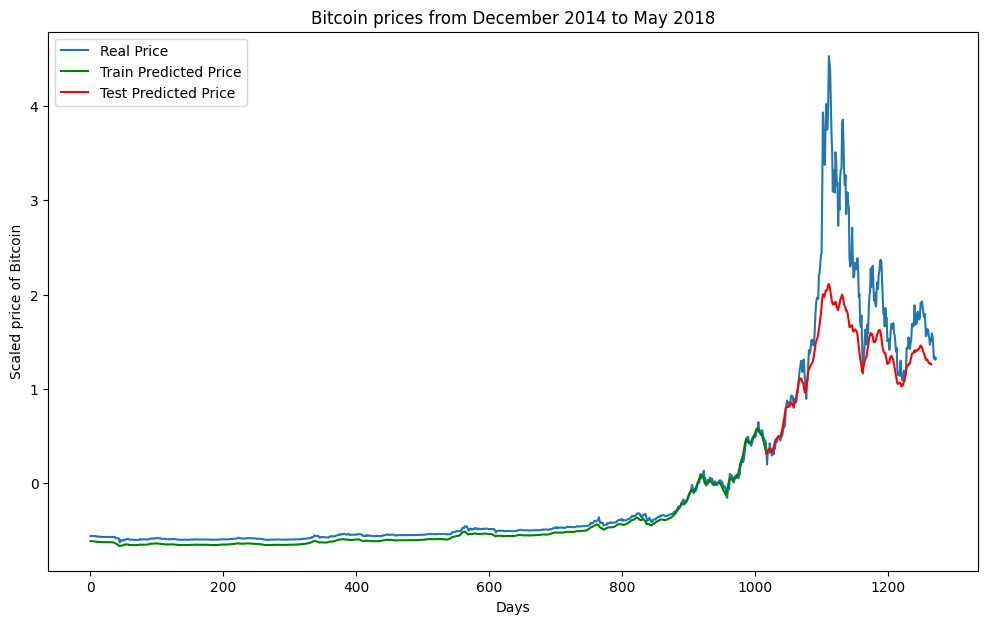

In [7]:
import torch           
import torchvision     
import pandas as pd    
import numpy as np     

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm 
device = torch.device('cpu')
HIDDEN_SIZE = 256     
LEARNING_RATE = 1e-4   
WINDOW_SIZE = 7        
BATCH_SIZE = 7         
EPOCHS = 500          
df = pd.read_csv('./btc.csv')
df = df.reindex(index=df.index[::-1]).reset_index(drop=True)

data_to_use=df['Close'].values # Coluna de preço
data_to_use

# Padronizador de dados do scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))

# Plot dos dados
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Preços da bitcoin (Dez 2014 - Maio 2018)')
plt.xlabel('Dias')
plt.ylabel('Preço (normalizado)')
plt.plot(scaled_data, label='Preço')
plt.legend()
plt.show()

def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size]) # Utilizando os window_size dias anteriores
        y.append(data[i+window_size])   # Para prever o window_size+1 dia
        
        i += 1
    assert len(X) ==  len(y)
    return X, y
# Separando as features das labels
X, y = window_data(scaled_data, WINDOW_SIZE)


# Split de treino e teste (80-20)
X_train  = np.array(X[:1018])
y_train = np.array(y[:1018])

X_test = np.array(X[1018:])
y_test = np.array(y[1018:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train  = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

N_TRAIN = X_train.shape[0]
TRAIN_LOADER = torch.utils.data.DataLoader(list(zip(X_train, y_train)),
                                           batch_size=BATCH_SIZE)

N_TEST = X_test.shape[0]
TEST_LOADER = torch.utils.data.DataLoader(list(zip(X_test, y_test)),
                                          batch_size=BATCH_SIZE)

class LSTM(torch.nn.Module):
    def __init__(self, n_features, n_hidden, window_size, n_layers=2):

        super(LSTM, self).__init__()

        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.window_size = window_size

        self.lstm = torch.nn.LSTM(n_features, n_hidden, n_layers, dropout=0.3,
                                  batch_first=True)
        self.linear = torch.nn.Linear(n_hidden * window_size, 1)

    def forward(self, X):

        h0 = torch.zeros(self.n_layers, X.size(0), self.n_hidden).to(device)
        c0 = torch.zeros(self.n_layers, X.size(0), self.n_hidden).to(device)

        lstm_out, _ = self.lstm(
            X,
            (h0, c0)
        )
        lstm_out = lstm_out.reshape(lstm_out.shape[0], -1)

        out = self.linear(lstm_out)
        return out
    
model = LSTM(n_features=1,                     # Só temos uma feature: preço
             n_hidden=HIDDEN_SIZE,             
             window_size=WINDOW_SIZE,
             n_layers=2).to(device=device)

loss_function = torch.nn.MSELoss('sum')                   # Critério de custo / perda
optimizer = torch.optim.Adam(model.parameters(),          # Optimizer
                             lr=LEARNING_RATE)     

def train_model(device, model, epochs, optimizer, loss_function,
                train_loader, test_loader, n_train, n_test, patience=20):

    # Initialize variables for early stopping
    best_val_loss = float('inf')
    no_improvement = 0

    # Gravando historico de treino e teste
    hist_train_loss = np.zeros(epochs)
    hist_test_loss = np.zeros(epochs)

    for epoch in range(epochs):

        print('Epoch {}/{}'.format(epoch+1, EPOCHS))
        print('-' * 60)

        train_epoch_loss = 0.
        test_epoch_loss = 0.

        # Modelo no modo de treino
        model.train()
        for data, labels in tqdm(train_loader):
            
            # Colocando dados no device
            data_device = data.to(device=device)
            labels_device = labels.to(device=device)

            pred = model(data_device)

            # Computando loss do treino
            loss = loss_function(pred, labels_device)

            with torch.no_grad():
                train_epoch_loss += loss.item()

            # Zerando o gradiente
            optimizer.zero_grad()
            
            # Aplicando gradientes e andando com o optimizer
            loss.backward()
            optimizer.step()

        # Setando modelo para evaluation
        model.eval()
        for test_data, test_labels in test_loader:
            
            # Colocando dados de teste no device
            test_data_device = test_data.to(device=device)
            test_labels_device = test_labels.to(device=device)

            # Calculando loss da validação
            with torch.no_grad():
                test_pred = model(test_data_device)
                test_loss = loss_function(test_pred, test_labels_device)
                test_epoch_loss += test_loss.item()

        # Armazenando histórico de loss
        hist_train_loss[epoch] = train_epoch_loss / n_train
        hist_test_loss[epoch] = test_epoch_loss / n_test

        # # Printando resultados
        print('Train Loss: {:.6f}'.format(hist_train_loss[epoch]))
        print('Test Loss: {:.6f}'.format(hist_test_loss[epoch]))

        # Verificando early stopping
        if hist_test_loss[epoch] < best_val_loss:
            best_val_loss = hist_test_loss[epoch]
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print('Stopping early...')
                break

    return hist_train_loss[:epoch], hist_test_loss[:epoch]


hist_train_loss, hist_test_loss = train_model(
                                        device=device,
                                        model=model, 
                                        epochs=EPOCHS,
                                        optimizer=optimizer,
                                        loss_function=loss_function,
                                        train_loader=TRAIN_LOADER,
                                        test_loader=TEST_LOADER,
                                        n_train=N_TRAIN,
                                        n_test=N_TEST
                                  )   

def return_pred(device, data_loader, model):

    model.eval() # Entra em evaluation mode

    pred = []

    with torch.no_grad(): # Não vamos calcular gradientes aqui
        for x, _ in data_loader:
            x_device = x.to(device=device)
            
            pred = pred + list(model(x_device).squeeze(1).cpu().detach().numpy())

    return pred    

pred_train = return_pred(device, TRAIN_LOADER, model)  

pred_test = return_pred(device, TEST_LOADER, model)



print("MEAN SQUARED ERROR")
print(mean_squared_error(scaled_data.reshape(-1,)[1018:1266], pred_test))
x_data = range(len(scaled_data))
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(x_data, list(scaled_data.reshape(-1,)), label='Real Price')
plt.plot(x_data[:1018], pred_train, label='Train Predicted Price', color='green')
plt.plot(x_data[1018:1266], pred_test, label='Test Predicted Price', color='red')
plt.legend()
plt.show()

Aumentando Batch Size

/home/pmilet/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 66.33it/s]


Train Loss: 0.009932
Test Loss: 0.602245
Epoch 2/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 67.63it/s]


Train Loss: 0.008299
Test Loss: 0.527030
Epoch 3/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 69.54it/s]


Train Loss: 0.004850
Test Loss: 0.320149
Epoch 4/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 67.57it/s]


Train Loss: 0.001441
Test Loss: 0.041072
Epoch 5/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.37it/s]


Train Loss: 0.000359
Test Loss: 0.048407
Epoch 6/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 69.71it/s]


Train Loss: 0.000236
Test Loss: 0.074049
Epoch 7/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.51it/s]


Train Loss: 0.000348
Test Loss: 0.061523
Epoch 8/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 67.69it/s]


Train Loss: 0.000239
Test Loss: 0.086920
Epoch 9/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.59it/s]


Train Loss: 0.000361
Test Loss: 0.068696
Epoch 10/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 71.18it/s]


Train Loss: 0.000254
Test Loss: 0.091088
Epoch 11/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 68.03it/s]


Train Loss: 0.000363
Test Loss: 0.069687
Epoch 12/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.90it/s]


Train Loss: 0.000260
Test Loss: 0.089621
Epoch 13/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 66.30it/s]


Train Loss: 0.000368
Test Loss: 0.069422
Epoch 14/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 68.29it/s]


Train Loss: 0.000271
Test Loss: 0.091073
Epoch 15/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 69.72it/s]


Train Loss: 0.000376
Test Loss: 0.067322
Epoch 16/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.48it/s]


Train Loss: 0.000309
Test Loss: 0.097297
Epoch 17/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.29it/s]


Train Loss: 0.000411
Test Loss: 0.064018
Epoch 18/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 67.59it/s]


Train Loss: 0.000318
Test Loss: 0.095764
Epoch 19/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.74it/s]


Train Loss: 0.000409
Test Loss: 0.064227
Epoch 20/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.91it/s]


Train Loss: 0.000364
Test Loss: 0.107403
Epoch 21/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.75it/s]


Train Loss: 0.000457
Test Loss: 0.062961
Epoch 22/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 68.45it/s]


Train Loss: 0.000386
Test Loss: 0.116459
Epoch 23/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 70.41it/s]


Train Loss: 0.000443
Test Loss: 0.066471
Epoch 24/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 71.65it/s]


Train Loss: 0.000403
Test Loss: 0.125089
Stopping early...
MEAN SQUARED ERROR
0.8281408229191718


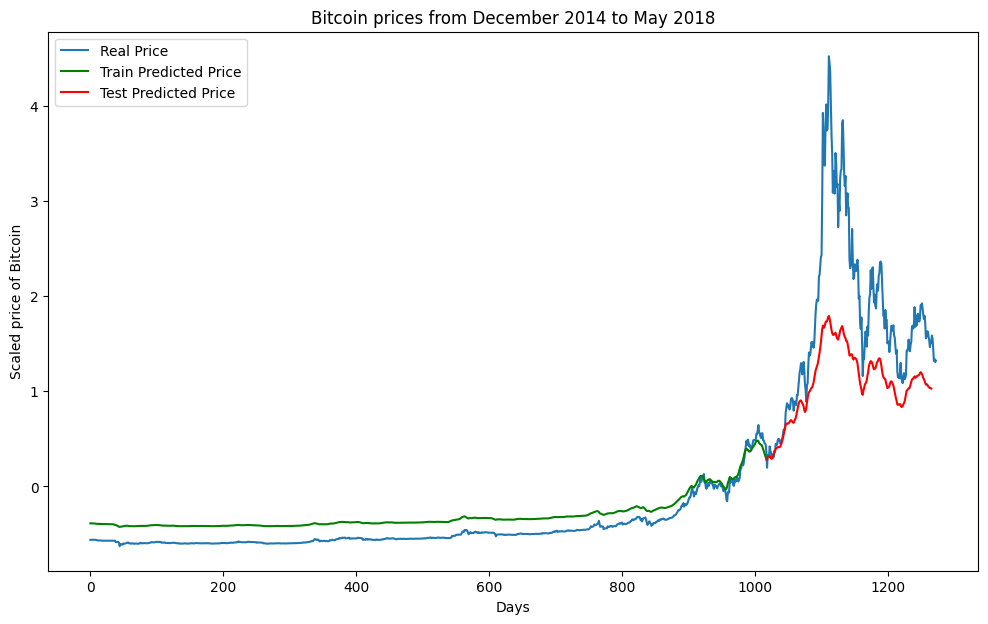

In [8]:
HIDDEN_SIZE = 256     
LEARNING_RATE = 1e-4   
WINDOW_SIZE = 7        
BATCH_SIZE = 14               


model = LSTM(n_features=1,                     # Só temos uma feature: preço
             n_hidden=HIDDEN_SIZE,             
             window_size=WINDOW_SIZE,
             n_layers=2).to(device=device)

loss_function = torch.nn.MSELoss('sum')                   # Critério de custo / perda
optimizer = torch.optim.Adam(model.parameters(),          # Optimizer
                             lr=LEARNING_RATE)     


hist_train_loss, hist_test_loss = train_model(
                                        device=device,
                                        model=model, 
                                        epochs=EPOCHS,
                                        optimizer=optimizer,
                                        loss_function=loss_function,
                                        train_loader=TRAIN_LOADER,
                                        test_loader=TEST_LOADER,
                                        n_train=N_TRAIN,
                                        n_test=N_TEST
                                  )   
  

pred_train = return_pred(device, TRAIN_LOADER, model)  

pred_test = return_pred(device, TEST_LOADER, model)


print("MEAN SQUARED ERROR")
print(mean_squared_error(scaled_data.reshape(-1,)[1018:1266], pred_test))
x_data = range(len(scaled_data))
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(x_data, list(scaled_data.reshape(-1,)), label='Real Price')
plt.plot(x_data[:1018], pred_train, label='Train Predicted Price', color='green')
plt.plot(x_data[1018:1266], pred_test, label='Test Predicted Price', color='red')
plt.legend()
plt.show()

Diminuindo learning rate

/home/pmilet/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 73.34it/s]


Train Loss: 0.036390
Test Loss: 0.585522
Epoch 2/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 75.19it/s]


Train Loss: 0.035285
Test Loss: 0.588905
Epoch 3/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 73.61it/s]


Train Loss: 0.034152
Test Loss: 0.592297
Epoch 4/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 71.37it/s]


Train Loss: 0.033032
Test Loss: 0.595691
Epoch 5/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 73.12it/s]


Train Loss: 0.031921
Test Loss: 0.599087
Epoch 6/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 75.18it/s]


Train Loss: 0.030808
Test Loss: 0.602494
Epoch 7/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 76.08it/s]


Train Loss: 0.029698
Test Loss: 0.605919
Epoch 8/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 71.80it/s]


Train Loss: 0.028588
Test Loss: 0.609359
Epoch 9/500
------------------------------------------------------------


100%|██████████| 146/146 [00:01<00:00, 74.38it/s]


Train Loss: 0.027470
Test Loss: 0.612817
Epoch 10/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 57.28it/s]


Train Loss: 0.026343
Test Loss: 0.616292
Epoch 11/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 52.13it/s]


Train Loss: 0.025220
Test Loss: 0.619781
Epoch 12/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 52.57it/s]


Train Loss: 0.024082
Test Loss: 0.623278
Epoch 13/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 54.95it/s]


Train Loss: 0.022963
Test Loss: 0.626781
Epoch 14/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 54.91it/s]


Train Loss: 0.021811
Test Loss: 0.630271
Epoch 15/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 53.74it/s]


Train Loss: 0.020692
Test Loss: 0.633744
Epoch 16/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 54.82it/s]


Train Loss: 0.019565
Test Loss: 0.637178
Epoch 17/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 56.41it/s]


Train Loss: 0.018458
Test Loss: 0.640560
Epoch 18/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 58.24it/s]


Train Loss: 0.017368
Test Loss: 0.643867
Epoch 19/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 68.26it/s]


Train Loss: 0.016305
Test Loss: 0.647073
Epoch 20/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 62.35it/s]


Train Loss: 0.015279
Test Loss: 0.650147
Epoch 21/500
------------------------------------------------------------


100%|██████████| 146/146 [00:02<00:00, 67.42it/s]


Train Loss: 0.014293
Test Loss: 0.653059
Stopping early...
MEAN SQUARED ERROR
4.469205843751057


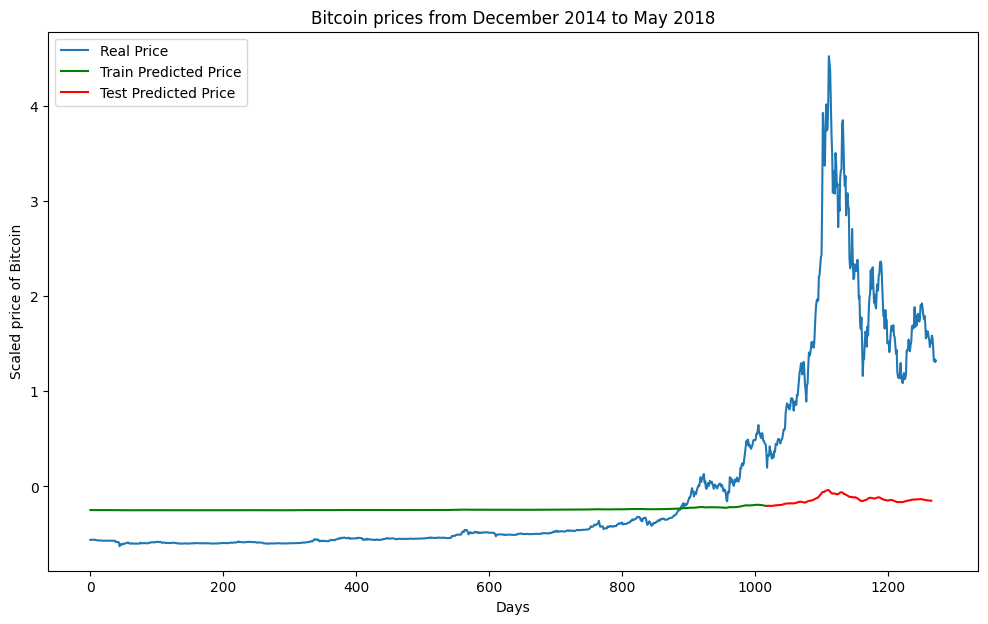

In [9]:
HIDDEN_SIZE = 256     
LEARNING_RATE = 1e-6 
WINDOW_SIZE = 7        
BATCH_SIZE = 7                 


model = LSTM(n_features=1,                     # Só temos uma feature: preço
             n_hidden=HIDDEN_SIZE,             
             window_size=WINDOW_SIZE,
             n_layers=2).to(device=device)

loss_function = torch.nn.MSELoss('sum')                   # Critério de custo / perda
optimizer = torch.optim.Adam(model.parameters(),          # Optimizer
                             lr=LEARNING_RATE)     


hist_train_loss, hist_test_loss = train_model(
                                        device=device,
                                        model=model, 
                                        epochs=EPOCHS,
                                        optimizer=optimizer,
                                        loss_function=loss_function,
                                        train_loader=TRAIN_LOADER,
                                        test_loader=TEST_LOADER,
                                        n_train=N_TRAIN,
                                        n_test=N_TEST
                                  )   
  

pred_train = return_pred(device, TRAIN_LOADER, model)  

pred_test = return_pred(device, TEST_LOADER, model)


print("MEAN SQUARED ERROR")
print(mean_squared_error(scaled_data.reshape(-1,)[1018:1266], pred_test))
x_data = range(len(scaled_data))
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(x_data, list(scaled_data.reshape(-1,)), label='Real Price')
plt.plot(x_data[:1018], pred_train, label='Train Predicted Price', color='green')
plt.plot(x_data[1018:1266], pred_test, label='Test Predicted Price', color='red')
plt.legend()
plt.show()

Aumentando hidden layer size

Epoch 1/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.23it/s]


Train Loss: 0.006844
Test Loss: 0.567636
Epoch 2/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.07it/s]


Train Loss: 0.008316
Test Loss: 0.482803
Epoch 3/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.64it/s]


Train Loss: 0.003568
Test Loss: 0.036046
Epoch 4/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.45it/s]


Train Loss: 0.001167
Test Loss: 0.056554
Epoch 5/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.76it/s]


Train Loss: 0.000721
Test Loss: 0.030277
Epoch 6/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.53it/s]


Train Loss: 0.000796
Test Loss: 0.025131
Epoch 7/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.27it/s]


Train Loss: 0.000924
Test Loss: 0.109596
Epoch 8/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.15it/s]


Train Loss: 0.000760
Test Loss: 0.021531
Epoch 9/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.87it/s]


Train Loss: 0.000632
Test Loss: 0.103361
Epoch 10/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.18it/s]


Train Loss: 0.000573
Test Loss: 0.031331
Epoch 11/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.06it/s]


Train Loss: 0.000477
Test Loss: 0.102097
Epoch 12/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.19it/s]


Train Loss: 0.000490
Test Loss: 0.041100
Epoch 13/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.27it/s]


Train Loss: 0.000426
Test Loss: 0.108003
Epoch 14/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.43it/s]


Train Loss: 0.000463
Test Loss: 0.046253
Epoch 15/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.12it/s]


Train Loss: 0.000400
Test Loss: 0.111444
Epoch 16/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.75it/s]


Train Loss: 0.000445
Test Loss: 0.050167
Epoch 17/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.45it/s]


Train Loss: 0.000370
Test Loss: 0.111191
Epoch 18/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.60it/s]


Train Loss: 0.000416
Test Loss: 0.052076
Epoch 19/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.58it/s]


Train Loss: 0.000350
Test Loss: 0.109023
Epoch 20/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.71it/s]


Train Loss: 0.000402
Test Loss: 0.053475
Epoch 21/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.61it/s]


Train Loss: 0.000339
Test Loss: 0.110042
Epoch 22/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.27it/s]


Train Loss: 0.000407
Test Loss: 0.054084
Epoch 23/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 15.97it/s]


Train Loss: 0.000338
Test Loss: 0.111436
Epoch 24/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.07it/s]


Train Loss: 0.000395
Test Loss: 0.054325
Epoch 25/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.11it/s]


Train Loss: 0.000308
Test Loss: 0.106854
Epoch 26/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.39it/s]


Train Loss: 0.000385
Test Loss: 0.053363
Epoch 27/500
------------------------------------------------------------


100%|██████████| 146/146 [00:08<00:00, 16.64it/s]


Train Loss: 0.000299
Test Loss: 0.104108
Epoch 28/500
------------------------------------------------------------


100%|██████████| 146/146 [00:09<00:00, 16.08it/s]


Train Loss: 0.000373
Test Loss: 0.053357
Stopping early...
MEAN SQUARED ERROR
0.31851246807597966


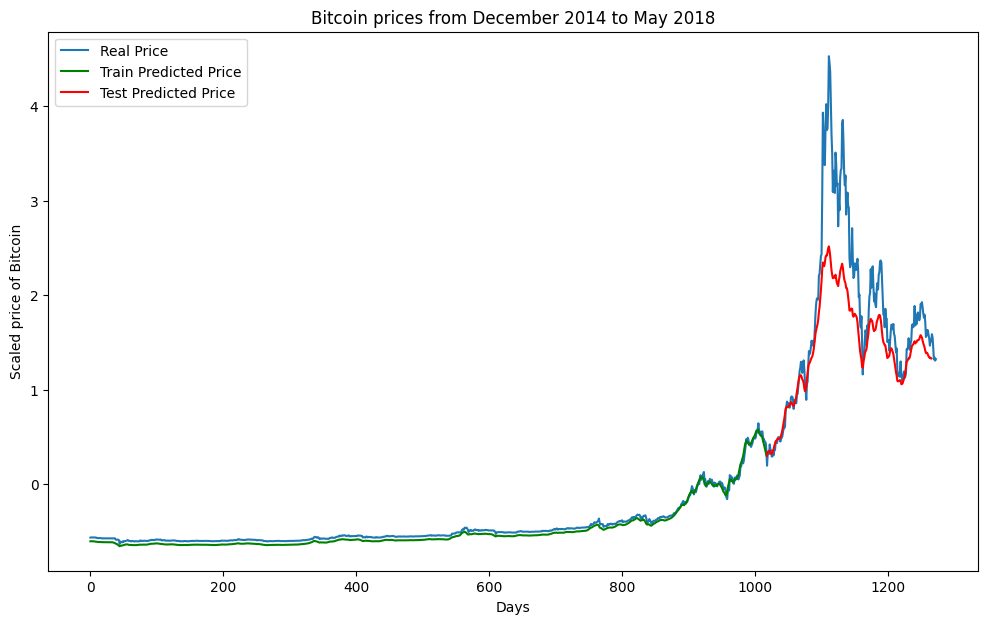

In [11]:
# HIDDEN_SIZE = 256     
# LEARNING_RATE = 1e-4   
# WINDOW_SIZE = 7        
# BATCH_SIZE = 7             
HIDDEN_SIZE = 512     
LEARNING_RATE = 1e-4 
WINDOW_SIZE = 7        
BATCH_SIZE = 7              


model = LSTM(n_features=1,                     # Só temos uma feature: preço
             n_hidden=HIDDEN_SIZE,             
             window_size=WINDOW_SIZE,
             n_layers=2).to(device=device)

loss_function = torch.nn.MSELoss('sum')                   # Critério de custo / perda
optimizer = torch.optim.Adam(model.parameters(),          # Optimizer
                             lr=LEARNING_RATE)     


hist_train_loss, hist_test_loss = train_model(
                                        device=device,
                                        model=model, 
                                        epochs=EPOCHS,
                                        optimizer=optimizer,
                                        loss_function=loss_function,
                                        train_loader=TRAIN_LOADER,
                                        test_loader=TEST_LOADER,
                                        n_train=N_TRAIN,
                                        n_test=N_TEST
                                  )   
  

pred_train = return_pred(device, TRAIN_LOADER, model)  

pred_test = return_pred(device, TEST_LOADER, model)


print("MEAN SQUARED ERROR")
print(mean_squared_error(scaled_data.reshape(-1,)[1018:1266], pred_test))
x_data = range(len(scaled_data))
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(x_data, list(scaled_data.reshape(-1,)), label='Real Price')
plt.plot(x_data[:1018], pred_train, label='Train Predicted Price', color='green')
plt.plot(x_data[1018:1266], pred_test, label='Test Predicted Price', color='red')
plt.legend()
plt.show()